In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [4]:
df= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [7]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2992,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt

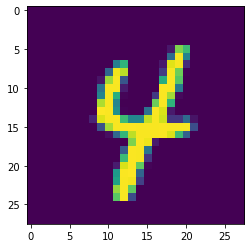

In [9]:
plt.imshow(df.iloc[24175,1:].values.reshape(28,28))

In [10]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(33600, 784)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
%%time
y_pread=knn.predict(X_test)

CPU times: user 30.3 s, sys: 4.64 s, total: 34.9 s
Wall time: 14.2 s


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pread)

0.9648809523809524

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale= StandardScaler()

In [52]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [22]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [23]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [24]:
X_train_trf.shape

(33600, 100)

In [25]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [26]:
%%time
y_pread=knn.predict(X_test_trf)

CPU times: user 9.42 s, sys: 3.54 s, total: 13 s
Wall time: 8.29 s


In [27]:
accuracy_score(y_test, y_pread)

0.9698809523809524

In [ ]:
for i in range(1,785):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pread=knn.predict(X_test_trf)
    print(accuracy_score(y_test, y_pread))
    

0.27285714285714285
0.4220238095238095
0.48488095238095236
0.6194047619047619
0.7297619047619047
0.8186904761904762
0.866904761904762
0.8938095238095238
0.9075
0.9248809523809524
0.9313095238095238
0.9422619047619047
0.9494047619047619
0.9538095238095238
0.9542857142857143
0.9585714285714285
0.9614285714285714
0.9620238095238095
0.9644047619047619
0.9658333333333333
0.9667857142857142


In [ ]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [ ]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
pca.explained_variance_
# Eigen values

In [ ]:
pca.components_.shape
# Eigen vectors

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [ ]:
pca.explained_variance_.shape

In [ ]:
pca.components_.shape

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))